In [1]:
import numpy as np
import matplotlib.pyplot as plt
from music21 import *
import glob
from collections import Counter
import pretty_midi

The number of unique pitches in the song: 56


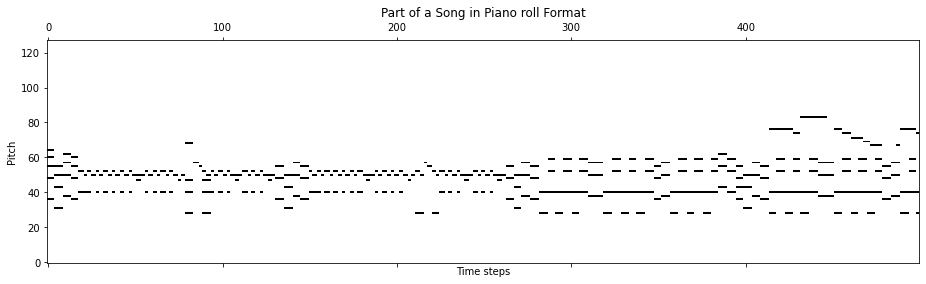

In [2]:
sampling_rate = 16

def generate_combine_piano_roll(midi_data, fs, program=None): #Function to generate piano roll format for the input song
    mat = None
    for inst in midi_data.instruments:
        inst.remove_invalid_notes() #removes the invalid notes in the song
        if inst.is_drum == False and (program is None or inst.program == program):
            inst_mat = inst.get_piano_roll(fs=fs) 
            if mat is None:
                mat = inst_mat
            elif inst_mat.shape == mat.shape:
                mat += inst_mat
            elif inst_mat.shape[1] < mat.shape[1]:
                inst_mat = np.pad(inst_mat, ((0,0),(0,mat.shape[1]-inst_mat.shape[1])), mode='constant')
                mat += inst_mat
            else:
                mat = np.pad(mat, ((0,0),(0,inst_mat.shape[1] - mat.shape[1])), mode='constant')
                mat += inst_mat
    
    if mat is None:
        return None
    
    mat[mat > 0] = 1
    return mat.T


def plot_pianoroll(FILE):
    midi_data = pretty_midi.PrettyMIDI(FILE)
    new_mat = generate_combine_piano_roll(midi_data, sampling_rate)
    mat= new_mat[:500,:] #changing the time steps to visualize the piano roll format
    matrix_new = new_mat.sum(axis=0) #To find the unique pitches in the song
    print("The number of unique pitches in the song:",np.count_nonzero(matrix_new))
    
    cax = plt.matshow(mat.T, aspect="auto", vmin=0, vmax=1, cmap="gray_r")
    plt.gca().invert_yaxis()
    plt.title('Part of a Song in Piano roll Format')
    plt.xlabel('Time steps')
    plt.ylabel('Pitch')
    plt.savefig('pianoroll.png')
    plt.show()
    
FILE  = '02.Metallica-The Four Horsemen.mid'
plot_pianoroll(FILE)

The number of unique pitches in the song: 12


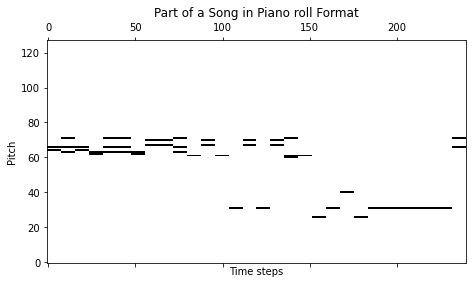

In [3]:
#op
op  = 'music_Withguitar.mid'
plot_pianoroll(op)